# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
#建立模型

In [15]:
model = Sequential()

In [16]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [17]:
model.add(Dense(units=128, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [18]:
model.add(Dense(units=64, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [19]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [22]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.2888 - acc: 0.9155 - val_loss: 0.1153 - val_acc: 0.9657
Epoch 2/10
48000/48000 [==============================] - 8s 163us/step - loss: 0.1092 - acc: 0.9658 - val_loss: 0.0946 - val_acc: 0.9700
Epoch 3/10
48000/48000 [==============================] - 7s 151us/step - loss: 0.0730 - acc: 0.9771 - val_loss: 0.1085 - val_acc: 0.9693
Epoch 4/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0563 - acc: 0.9822 - val_loss: 0.1129 - val_acc: 0.9689
Epoch 5/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0432 - acc: 0.9864 - val_loss: 0.1006 - val_acc: 0.9734
Epoch 6/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.0362 - acc: 0.9884 - val_loss: 0.1147 - val_acc: 0.9698
Epoch 7/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.0289 - acc: 0.9911 - val_loss: 0.1045 - 

# 以圖形顯示訓練過程

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

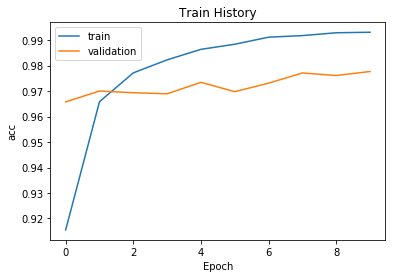

In [24]:
show_train_history(train_history,'acc','val_acc')

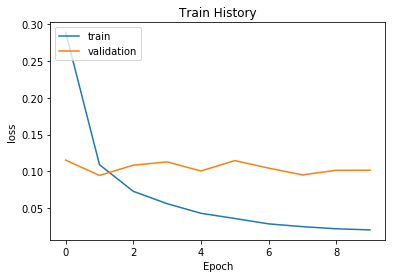

In [25]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [26]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 48us/step

accuracy= 0.9787


## 正確率似乎僅提高一點點而已，可能在activation做修改或者訓練次數增加會提高一點點